In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate synthetic classification data
data = make_classification()

# Generate classification data with specific parameters
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=0)

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize the Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis()

# Perform cross-validation and calculate accuracy scores
score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)

# Select a subset of features from X
X_selected = X[:, :10]

# Fit the model on the selected features
model.fit(X_selected, y)

# Example row for prediction
row = np.array([17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.3001, 0.14710, 0.2419, 0.07871])

# Select a subset of features from the example row
row_selected = row[:10]

# Calculate mean and standard deviation of cross-validation scores
cv_mean = np.mean(score)
cv_std = np.std(score)

# Fit the model on the full dataset
model.fit(X, y)

# Make predictions on the full dataset
y_pred = model.predict(X)

# Make predictions on a single example row
y_pred = model.predict([row])

# Define grid of hyperparameters to search over
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

# Perform grid search to find the best hyperparameters
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
result = search.fit(X, y)

# Print the best score and best hyperparameters found by grid search
print('Best Score: %f' % result.best_score_)
print('Best Params: %s' % result.best_params_)

Best Score: 0.718333
Best Params: {'solver': 'svd'}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/breast-cancer.csv")
df.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self, X, y):
        # Calculate the dimensions of the input data
        height, width = X.shape
        
        # Get the unique classes and the number of classes
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        # Calculate the total scatter matrix
        scatter_t = np.cov(X.T) * (height - 1)
        
        # Initialize within-class scatter matrix
        scatter_w = 0
        
        # Calculate within-class scatter matrix
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items) - 1)
        
        # Calculate between-class scatter matrix
        scatter_b = scatter_t - scatter_w
        
        # Compute eigenvalues and eigenvectors
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        
        # Perform dimensionality reduction using the selected number of components
        pc = X.dot(eig_vectors[:, ::-1][:, :self.n_components])
        
        # Print shapes for debugging
        print("X shape:", X.shape)
        print("Eigenvalue shape:", eig_vectors[:, ::-1][:, :self.n_components].shape)
        print("Projected data shape:", pc.shape)

        # Plot the data if the number of components is 2
        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:, 0], pc[:, 1])
            else:
                colors = ['r', 'g', 'b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y == label)]
                    plt.scatter(class_data[:, 0], class_data[:, 1], c=color)
            plt.show()
        
        # Return the selected eigenvectors for further analysis
        return eig_vectors[:, ::-1][:, :self.n_components]

X shape: (120, 4)
Eigenvalue shape: (4, 2)
Projected data shape: (120, 2)


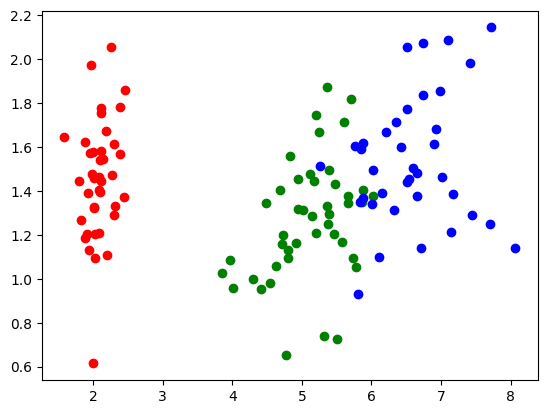

<ipython-input-4-2d6c52486b83>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=Y_test, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


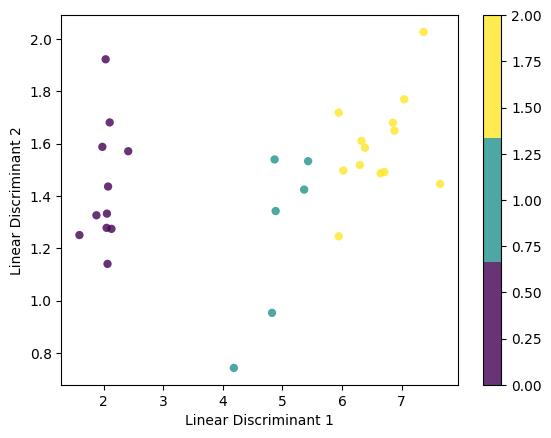

In [4]:
LDA_obj = LDA(n_components=2)  # Create an instance of the LDA class with 2 components
data = load_iris()  # Load the Iris dataset
X, y = data.data, data.target  # Split the data into input features (X) and target labels (y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

LDA_object = LDA(n_components=2)  # Create another instance of the LDA class with 2 components
proj_matrix = LDA_object.transform(X_train, Y_train)  # Compute the projection matrix using LDA on the training data

X_test_proj = X_test.dot(proj_matrix)  # Project the testing data onto the LDA subspace

x1, x2 = X_test_proj[:, 0], X_test_proj[:, 1]  # Extract the projected values for the two LDA components

# Create a scatter plot of the projected data points
plt.scatter(
    x1, x2, c=Y_test, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")  # Set the label for the x-axis
plt.ylabel("Linear Discriminant 2")  # Set the label for the y-axis
plt.colorbar()  # Add a colorbar to the plot
plt.show()  # Display the plot